# Практическая работа №1: Формирование и первичная обработка выборки. Ранжированный и интервальный ряды

Выполнил студент гр. 1381 Богданов Егор. Вариант №1

## Цель работы

Ознакомление с основными правилами формирования выборки и подготовки выборочных данных к статистическому анализу.

## Основные теоретические положения
Статистический ряд - последовательность элементов выборки,расположенных в порядке их получения

Ранжированый ряд - последовательность элементов выборки,расположенных в порядке возрастания из значений

Ранг - номер элемента ранжированого ряда в последовательности

Вариационный ряд - Получается из ранжированого ряда в результате объединения одинаковых элементов.

Варианта - Элемент вариационного ряда

Интервальный ряд - вариационный ряд, разбитый на интервалы

Эмпирическая функция распределения:
$$F^*(\tilde x_i)=\frac{m^{sum}_i}{N}$$
$$m^{sum}_i=\sum^{i-1}_{j=1}m_j;i=1,...,k+1$$

Формула Стерджеса: $k=1+3.31*lgN$, где к-количество интервалов


## Постановка задачи

Осуществить формирование репрезентативной выборки заданного объема из имеющейся генеральной совокупности экспериментальных данных. Осуществить последовательное преобразование полученной выборки в ранжированный, вариационный и интервальный ряды. Применительно к интервальному ряду построить и отобразить графически полигон, гистограмму и эмпирическую функцию распределения для абсолютных и относительных частот. Полученные результаты содержательно проинтерпретировать.

Порядок выполнения работы:
1. Выбрать программное обеспечение или язык программирования для выполнения практических работ и обосновать его выбор.
2. Выбрать двумерную генеральную совокупность, предварительно согласовав её с преподавателем. Указать, откуда была взята генеральная совокупность и предоставить ссылку.
3. Из генеральной совокупности сформировать выборку заданного объёма в соответствии с полученным от преподавателя номером. Указать, каким образом была сформирована выборка.
4. Последовательно преобразовать выборку в ранжированный, вариационный и интервальный ряды. Интервальный ряд представить в виде табл. 1. Результаты содержательно проинтерпретировать.
5. Для абсолютных частот построить и отобразить графически полигон, гистограмму и эмпирическую функцию. Сделать выводы.
6. Выполнить п. 5 для относительных частот. Сравнить результаты и сделать выводы.

## Выполнение работы
### Задание 1
Для выполнения был выбран язык программирования Python. Большое количество библиотек и функций данного языка программирования предоставляют широкий и удобный инструментарий для обработки данных 

### Задание 2
Была выбрана генеральная совокупность : "Данные наблюдения относительно объемного веса ν (г/см³) при влажности 10% и модуля упругости E (кг/см²) при сжатии вдоль волокон древесины резонансной ели (csv-формат)". Ссылка на загрузку данных: https://se.moevm.info/lib/exe/fetch.php/courses:statistical_methods_of_experimental_data_handling:sample.zip

### Задание 3
Из генеральной совокупности была взята выборка,состоящая из 97 элементов, путём взятия элементов с 104-ого по 200 включительно

### Задание 4
#### Получение ранжированного ряда

In [6]:
import pandas as pd
file=pd.read_csv('data.csv', delimiter=';', encoding='utf-8')
X=file['nu']
Y=file['E']
Xr=X.sort_values().reset_index(drop=True)
print(Xr)
Yr=Y.sort_values().reset_index(drop=True)
print(Yr)


0     362
1     371
2     372
3     376
4     377
     ... 
92    560
93    573
94    576
95    593
96    623
Name: nu, Length: 97, dtype: int64
0      81.7
1      91.9
2      95.8
3      97.8
4      98.8
      ...  
92    169.8
93    169.9
94    181.0
95    187.4
96    195.7
Name: E, Length: 97, dtype: float64


#### Получение вариационного ряда

In [7]:
Xv=Xr.drop_duplicates(keep='first').reset_index(drop=True)
print(Xv)

Yv=Yr.drop_duplicates(keep='first').reset_index(drop=True)
print(Yv)


0     362
1     371
2     372
3     376
4     377
     ... 
68    560
69    573
70    576
71    593
72    623
Name: nu, Length: 73, dtype: int64
0      81.7
1      91.9
2      95.8
3      97.8
4      98.8
      ...  
88    169.8
89    169.9
90    181.0
91    187.4
92    195.7
Name: E, Length: 93, dtype: float64


#### Получение интервального ряда

In [8]:
import math 
ky=math.floor(1+3.31*math.log(Yv.size,10))
kx=math.floor(1+3.31*math.log(Xv.size,10))

hx=(Xv.max()-Xv.min())/kx
hy=(Yv.max()-Yv.min())/ky

Intervals_X=[]
for i in range(1,kx+1):
    Intervals_X.append([float(Xv.min()+(i-1)*hx),float(Xv.min()+i*hx)])
    print(i,Intervals_X[i-1])
    
Intervals_Y=[]
print('\n')
for i in range(1,ky+1):
    Intervals_Y.append([float(Yv.min()+(i-1)*hy),float(Yv.min()+i*hy)])
    print(i,Intervals_Y[i-1])
print('tilde')
Xtilda=[]
Ytilda=[]
for i in range(7):
    Xtilda.append((Intervals_X[i][0]+Intervals_X[i][1])/2)
    Ytilda.append((Intervals_Y[i][0]+Intervals_Y[i][1])/2)
    print(i,Xtilda[i],Ytilda[i])
My=[0,0,0,0,0,0,0]
Mx=[0,0,0,0,0,0,0]
print('\n')
for i in range(6):
    for j in range(Xv.size):
        if Intervals_X[i][0]<=Xv[j] and Intervals_X[i][1]>Xv[j]:
            Mx[i]+=1
    for j in range(Yv.size):
        if Intervals_Y[i][0]<=Yv[j] and Intervals_Y[i][1]>Yv[j]:
            My[i]+=1

for j in range(Xv.size):
        if Intervals_X[6][0]<=Xv[j] and Intervals_X[6][1]>=Xv[j]:
            Mx[6]+=1
for j in range(Yv.size):
        if Intervals_Y[6][0]<=Yv[j] and Intervals_Y[6][1]>=Yv[j]:
            My[6]+=1

print(Mx,Xv.size)
print(My,Yv.size)
Mxtilda=[]
Mytilda=[]

for i in range(7):
    Mxtilda.append(Mx[i]/Xv.size)
    Mytilda.append(My[i]/Yv.size)
    print(i,Mxtilda[i],Mytilda[i])
Mxsum=[]
Mxsum.append(Mx[0])

Mysum=[]
Mysum.append(My[0])
print('\n')
for i in range(1,7):
    Mxsum.append(Mxsum[i-1]+Mx[i])
    Mysum.append(Mysum[i-1]+My[i])
    print(i,Mxsum[i],Mysum[i])

print('\nMSumTilda\n')
Mysumtilda=Mysum
Mxsumtilda=Mxsum
for i in range(7):
    Mysumtilda[i]=Mysumtilda[i]/Yv.size
    Mxsumtilda[i]=Mxsumtilda[i]/Xv.size
    print(i,Mxsumtilda[i],Mysumtilda[i])


1 [362.0, 399.2857142857143]
2 [399.2857142857143, 436.57142857142856]
3 [436.57142857142856, 473.8571428571429]
4 [473.8571428571429, 511.1428571428571]
5 [511.1428571428571, 548.4285714285714]
6 [548.4285714285714, 585.7142857142858]
7 [585.7142857142858, 623.0]


1 [81.7, 97.9857142857143]
2 [97.9857142857143, 114.27142857142857]
3 [114.27142857142857, 130.55714285714285]
4 [130.55714285714285, 146.84285714285716]
5 [146.84285714285716, 163.12857142857143]
6 [163.12857142857143, 179.4142857142857]
7 [179.4142857142857, 195.7]
tilde
0 380.6428571428571 89.84285714285716
1 417.92857142857144 106.12857142857143
2 455.2142857142857 122.41428571428571
3 492.5 138.7
4 529.7857142857142 154.9857142857143
5 567.0714285714287 171.27142857142857
6 604.3571428571429 187.55714285714285


[10, 16, 23, 9, 10, 3, 2] 73
[4, 14, 36, 20, 13, 3, 3] 93
0 0.136986301369863 0.043010752688172046
1 0.2191780821917808 0.15053763440860216
2 0.3150684931506849 0.3870967741935484
3 0.1232876712328767 0.2150537

Таблица для столбца nu:
| i      | $[x_i,x_{i+1})$                       | $\tilde{x_i}$ | $m_i$ | $\tilde{m_i}$ | $m_i^{sum}$ | $\tilde m_i^{sum}$|
|--------|-------------                          |------|-----|------|---------|---------|
| 1      |[362.0, 399.2857142857143)             |380.6428571428571 |10|0.136986301369863 |10|0.136986301369863         |
| 2      |[399.2857142857143, 436.57142857142856)|417.92857142857144|16|0.2191780821917808|26|0.3561643835616438         |
| 3      |[436.57142857142856, 473.8571428571429)|455.2142857142857 |23|0.3150684931506849|49|0.6712328767123288          |
| 4      |[473.8571428571429, 511.1428571428571) |492.5             |9 |0.1232876712328767|58|0.7945205479452054          |
| 5      |[511.1428571428571, 548.4285714285714) |529.7857142857142 |10|0.136986301369863 |68|0.9315068493150684          |
| 6      |[548.4285714285714, 585.7142857142858) |567.0714285714287 |3 |0.0410958904109589|71|0.9726027397260274          |
| 7      |[585.7142857142858, 623.0]             |604.3571428571429 |2 |0.0273972602739726|73|1         |
| $\sum$ |-                                      |-                 |73|1      |   -      |     -    |

Таблица для столбца E:
| i      | $[x_i,x_{i+1})$                        | $\tilde{x_i}$ | $m_i$ | $\tilde{m_i}$ | $m_i^{sum}$ | $\tilde m_i^{sum}$|
|--------|-------------                           |------|-----|------|---------|---------|
| 1      |[81.7, 97.9857142857143)                |89.84285714285716 |4|0.043010752688172046 |4 |0.043010752688172046        |
| 2      |[97.9857142857143, 114.27142857142857)  |106.12857142857143|14|0.15053763440860216 |18|0.1935483870967742        |
| 3      |[114.27142857142857, 130.55714285714285)|122.41428571428571|36|0.3870967741935484  |54|0.5806451612903226          |
| 4      |[130.55714285714285, 146.84285714285716)|138.7             |20 |0.21505376344086022|74|0.7956989247311828          |
| 5      |[146.84285714285716, 163.12857142857143)|154.9857142857143 |13|0.13978494623655913 |87|0.9354838709677419          |
| 6      |[163.12857142857143, 179.4142857142857) |171.27142857142857|3 |0.03225806451612903 |90|0.967741935483871          |
| 7      |[179.4142857142857, 195.7] |187.55714285714285|3 |0.03225806451612903 |93|1         |
| $\sum$ |-                                      |-                  |93|1      |   -        |     -    |

### Задание 5


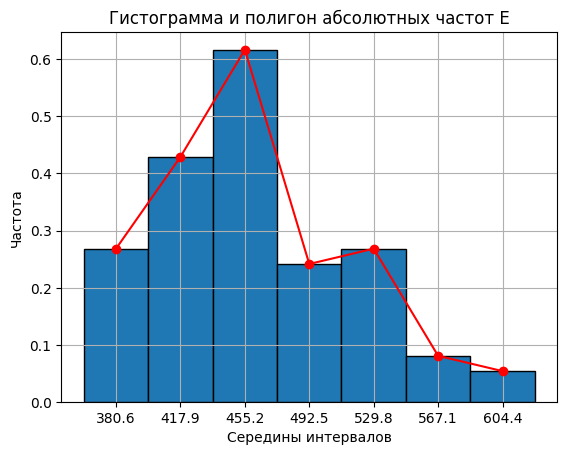

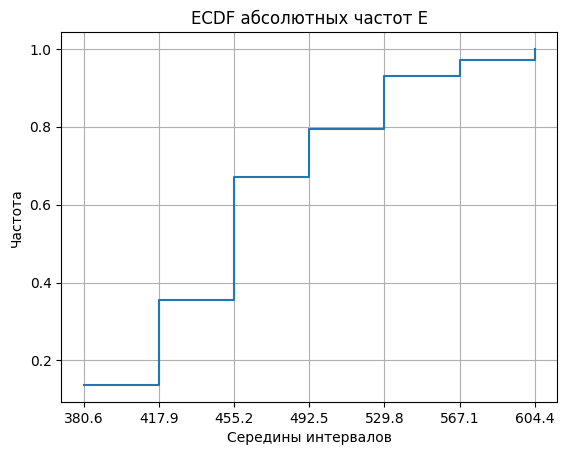

In [149]:
import numpy as np
hist,edges=np.histogram(Xv,bins=7)
hist_h=hist/hx
plt.bar(Xtilda,hist_h,width=hx,edgecolor='black')
plt.xticks(Xtilda)
plt.plot(Xtilda,hist_h,'o-',color='red')
plt.grid()
plt.title("Гистограмма и полигон абсолютных частот E")
plt.xlabel("Середины интервалов")
plt.ylabel("Частота")
plt.show()

plt.step(Xtilda,Mxsum,where='post')
plt.xticks(Xtilda)
plt.title("ECDF абсолютных частот E")
plt.xlabel("Середины интервалов")
plt.ylabel("Частота")
plt.grid()
plt.show()


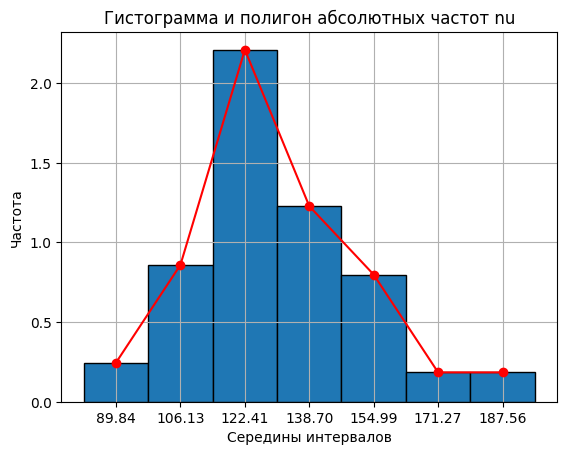

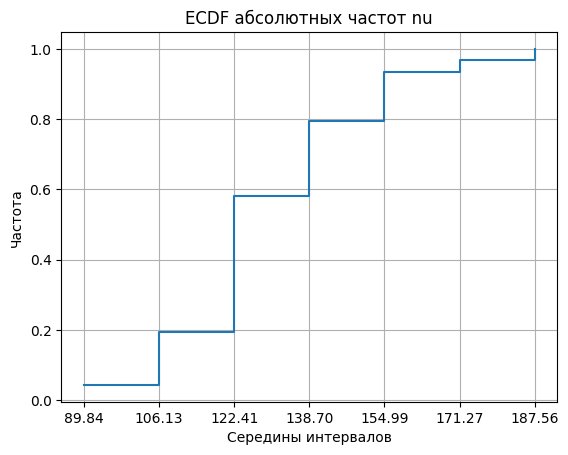

In [152]:
hist,edges=np.histogram(Yv,bins=7)
hist_h=hist/hy
plt.bar(Ytilda,hist_h,width=hy,edgecolor='black')
plt.plot(Ytilda,hist_h,'o-',color='red')
plt.xticks(Ytilda)
plt.grid()
plt.title("Гистограмма и полигон абсолютных частот nu")
plt.xlabel("Середины интервалов")
plt.ylabel("Частота")
plt.show()

plt.step(Ytilda,Mysum,where='post')
plt.xticks(Ytilda)
plt.title("ECDF абсолютных частот nu")
plt.xlabel("Середины интервалов")
plt.ylabel("Частота")
plt.grid()
plt.show()

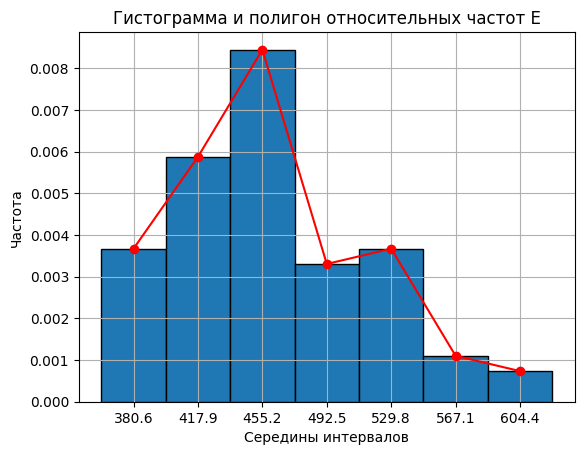

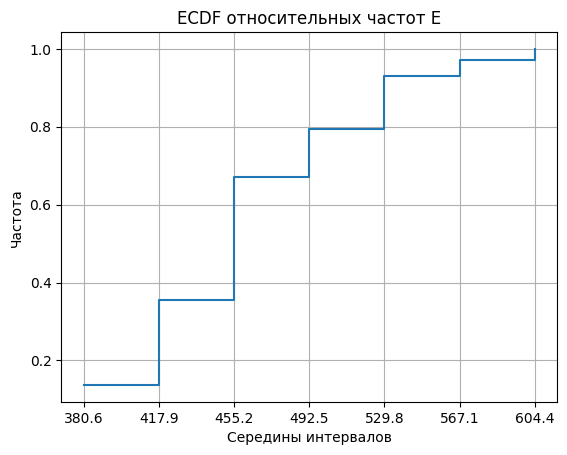

In [146]:
hist,edges=np.histogram(Xv,bins=7)
hist_h=hist/hx
hist_h=hist_h/73
plt.bar(Xtilda,hist_h,width=hx,edgecolor='black')
plt.xticks(Xtilda)
plt.plot(Xtilda,hist_h,'o-',color='red')
plt.grid()
plt.title("Гистограмма и полигон относительных частот E")
plt.xlabel("Середины интервалов")
plt.ylabel("Частота")
plt.show()


plt.step(Xtilda,Mxsumtilda,where='post')
plt.xticks(Xtilda)
plt.title("ECDF относительных частот E")
plt.xlabel("Середины интервалов")
plt.ylabel("Частота")
plt.grid()
plt.show()




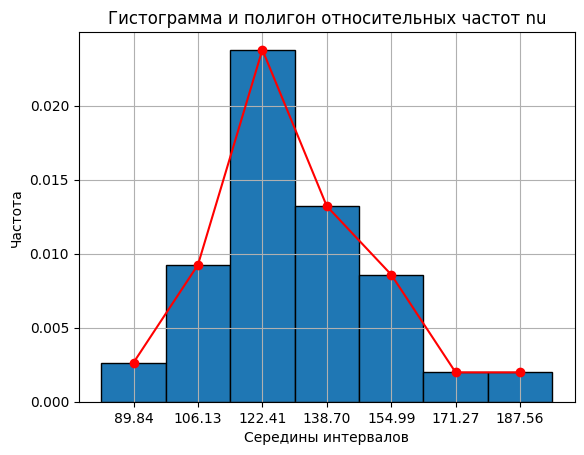

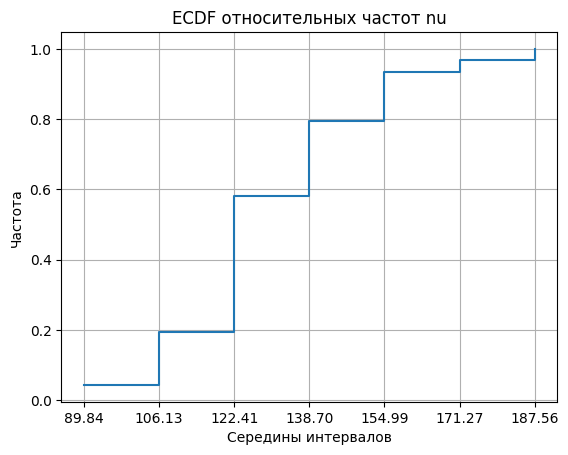

In [147]:
hist,edges=np.histogram(Yv,bins=7)
hist_h=hist/hy
hist_h=hist_h/93
plt.bar(Ytilda,hist_h,width=hy,edgecolor='black')
plt.plot(Ytilda,hist_h,'o-',color='red')
plt.xticks(Ytilda)
plt.grid()
plt.title("Гистограмма и полигон относительных частот nu")
plt.xlabel("Середины интервалов")
plt.ylabel("Частота")
plt.show()

plt.step(Ytilda,Mysumtilda,where='post')
plt.xticks(Ytilda)
plt.title("ECDF относительных частот nu")
plt.xlabel("Середины интервалов")
plt.ylabel("Частота")
plt.grid()
plt.show()

## Выводы
В ходе выполнения практической работы было выполнено следующее:
1. Было выбран язык программирования Python для выполнения практических работ
2. Была выбрана и согласована с преподавателем двумерная генеральная совокупность. Также была указана ссылка на источник.
3. Из генеральной совокупности была сформирована выборка заданного объёма в соответствии с полученным от преподавателя номером. 
4. Выборка была последовательно преобразована в ранжированный, вариационный и интервальный ряды. Интервальный ряд представлен в виде таблицы.
5. Для абсолютных частот были построены и отображены графически полигон, гистограмма и эмпирическая функция.
6. Аналогично былии построены и отображены графически полигон, гистограмма и эмпирическая функция для относительных частот